# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [6]:
# import all libraies
import pickle
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.contrib.layers import flatten
import cv2

import math

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import os
import csv
import time

In [7]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

TrainingDataDir = "/Users/sliu/Google Drive/MOOC/SelfDrivingCarData/Term1/L11_TrafficSignClassifier/"

training_file = TrainingDataDir + "train.p"

testing_file = TrainingDataDir + "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

is_features_normal = False
is_features_grayscale = False

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [8]:
### Replace each question mark with the appropriate value.
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.bincount(y_test).nonzero()[0].size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

30


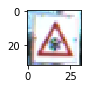

In [9]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Preprocess the data here.

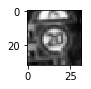

In [11]:
# RGB to grayscale
if not is_features_grayscale:
    X_train = np.mean(X_train, axis=3,dtype=int)
    X_train.resize([X_train.shape[0],X_train.shape[1],X_train.shape[2],1])
    X_test = np.mean(X_test, axis=3,dtype=int)
    X_test.resize([X_test.shape[0],X_test.shape[1],X_test.shape[2],1])
    is_features_grayscale = True

index = random.randint(0, len(X_train))
image = X_train[0].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

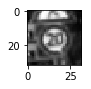

In [12]:
# Nomalize input image data
def normalize_grayscale(image_data,min,max):
    """
    Normalize the image data with Min-Max scaling to a range of [min, max]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    grayscale_min = 0
    grayscale_max = 255
    return min + ( ( (image_data - grayscale_min)*(max - min) )/( grayscale_max - grayscale_min ) )

#X_train = X_train.astype('float32')
if not is_features_normal:
    X_train = normalize_grayscale(X_train,-0.5,0.5)
    X_test = normalize_grayscale(X_test,-0.5,0.5)
    is_features_normal = True

#assert(math.isclose(np.min(X_train), -0.5, abs_tol=1e-5) and math.isclose(np.max(X_train), 0.5, abs_tol=1e-5)), "The range of the training data is: %.1f to %.1f" % (np.min(X_train), np.max(X_train))
#assert(math.isclose(np.min(X_val), -0.5, abs_tol=1e-5) and math.isclose(np.max(X_val), 0.5, abs_tol=1e-5)), "The range of the validation data is: %.1f to %.1f" % (np.min(X_val), np.max(X_val))
index = random.randint(0, len(X_train))
image = X_train[0].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I have performed two preprocessing operations on the image data:

1. RGB to Grayscale
Color does not matter when classifying traffic signs hence converting to grayscale is statiscally invariant. This could help wiht simplifying the input and speed up the training.

2. Normalization
The training data is normalized to the range of [-0.5,0.5] using min-max method. This is to avoid the quatization errors. As a guiding priciple, we would like  the input data to have zero mean and equal variance whenver possible. Another beneifit of normalization is the reduce the searching workload of the optimizer.

In [13]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, test_size=0.33)

In [14]:
# affine transform （not yet implemented)
def affine_transform(img, angle, pixels, angle_adjust, right=True):

    cols, rows, ch = img.shape
        
    pts1 = np.float32([[10,10], [200,50], [50,250]])

    if right:
        pts2 = np.float32([[10, 10], [200+pixels, 50], [50, 250]])
        angle =- angle_adjust
    else:
        pts2 = np.float32([[10, 10], [200-pixels, 50], [50, 250]])
        angle =- angle_adjust

    M = cv2.getAffineTransform(pts1, pts2)

    dst = cv2.warpAffine(img, M, (rows, cols))

    return dst.reshape((cols, rows, ch)), angle


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I am holding  30% of the training data as validation data. The model will be trained and validated using the train and validation data and will be tested once using the test data at the very end.  

I could have also generated more fake data using OpenCV's affine method. 

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Setup TensorFlow


In [16]:
# Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.
# LeNet5
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1 # large sigma means the initial weights have large peaks and very oppinated
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #dropout
    conv1 = tf.nn.dropout(conv1, 0.75)
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #dropout
    conv2 = tf.nn.dropout(conv2, 0.75)

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    #dropout
    #fc1 = tf.nn.dropout(fc1, 0.5)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
#I started with implementing the LeNet 5 architecture learned in the CNN lab with some additional dropouts optimization. The artecture looks like the following:
Conv -> Activation -> Pool -> Dropout -> Conv -> Activation -> Pool -> Dropout -> FC1 -> Activation -> FC2 -> Activation -> FC3 -> Activation

In [17]:
### Train your model here.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
#x = tf.placeholder(tf.float32, (None, 32, 32, 3))#AlexNet
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
#resized = tf.image.resize_images(x, (227, 227))

# Training pipeline
EPOCHS = 20
BATCH_SIZE = 256
rate = 0.001
logits = LeNet(x)
"""
#alex net
fc7 = AlexNet(resized, feature_extract=True)
fc7 = tf.stop_gradient(fc7)
shape = (fc7.get_shape().as_list()[-1], n_classes)
fc8W = tf.Variable(tf.truncated_normal(shape, stddev=1e-2))
fc8b = tf.Variable(tf.zeros(n_classes))
logits = tf.nn.xw_plus_b(fc7, fc8W, fc8b)
"""
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
#training_operation = optimizer.minimize(loss_operation,var_list=[fc8W, fc8b])

In [ ]:
### Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Model Evaluation
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
### Train the model
t = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
            
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

print("Training Time: %.3f seconds" % (time.time() - t))

Training...

EPOCH 1 ...
Validation Accuracy = 0.254

EPOCH 2 ...
Validation Accuracy = 0.596

EPOCH 3 ...
Validation Accuracy = 0.714

EPOCH 4 ...
Validation Accuracy = 0.774

EPOCH 5 ...
Validation Accuracy = 0.813

EPOCH 6 ...
Validation Accuracy = 0.843

EPOCH 7 ...
Validation Accuracy = 0.855

EPOCH 8 ...
Validation Accuracy = 0.868

EPOCH 9 ...
Validation Accuracy = 0.881

EPOCH 10 ...
Validation Accuracy = 0.891

EPOCH 11 ...
Validation Accuracy = 0.899

EPOCH 12 ...
Validation Accuracy = 0.905

EPOCH 13 ...
Validation Accuracy = 0.905

EPOCH 14 ...
Validation Accuracy = 0.913

EPOCH 15 ...
Validation Accuracy = 0.920

EPOCH 16 ...
Validation Accuracy = 0.916

EPOCH 17 ...
Validation Accuracy = 0.922



In [ ]:
### Test the model using test data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I have the following setting:
optimizer = Adam Optimizer
EPOCHS = 10
BATCH_SIZE = 256
rate = 0.002
mu = 0
sigma = 0.1

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
My approached is mostly based on trial and error. I started with LeNet5 architecture then experimented with different preprocessing techniques and hyperparameter settings such as epochs, batch size, rate and mu/sigma for weights initialization. I was able to get the validation accuracy of 97.3%. 

Then I tried the AlextNet learned from the Transfer Learning class. But I'm not able to get a higher accurate compare to LeNet5 architecture. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
TestImages = []
ImageNames = []

for f in os.listdir("testTrafficSigns/"):
    print(f)
    image = cv2.imread("testTrafficSigns/"+f,cv2.IMREAD_GRAYSCALE)
    image = np.asarray(image)
    imshow = image.squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")    
    image = cv2.resize(image,(32,32))
    image.resize(32,32,1)
    #print('This image', f, 'is:', type(image), 'with dimesions:', image.shape) 
    TestImages.append(image)
    ImageNames.append(f)
    
TestImages = np.asarray(TestImages)
#print(TestImages.shape)
TestImages = normalize_grayscale(TestImages,-0.5,0.5)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._

**Answer:**

In [ ]:
### Run the predictions here.
y = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y, 1)
names, labels = [], []

with open ('signnames.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader, None)
    for row in reader:
        labels.append(int(row[0]))
        names.append(row[1])   

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # Run Inference
    y_pred_cls = sess.run(y_pred_cls, feed_dict={x: TestImages})
    for i in y_pred_cls:
        print(names[i])

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
### Run the predictions here.
y = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y, 1)
topFive=tf.nn.top_k(y, k=5, sorted=True, name=None)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # Run Inference
    op = sess.run(topFive, feed_dict={x: TestImages})
    for i in range(op.indices.shape[0]):
        print("top five sign name for:",ImageNames[i])
        for j in range(5):
            print("    ",names[op.indices[i][j]])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.